In [3]:
print(df.columns.tolist())

['gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


Confusion Matrix:
 [[2741  764]
 [ 631 4235]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      3505
           1       0.85      0.87      0.86      4866

    accuracy                           0.83      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.83      0.83      0.83      8371



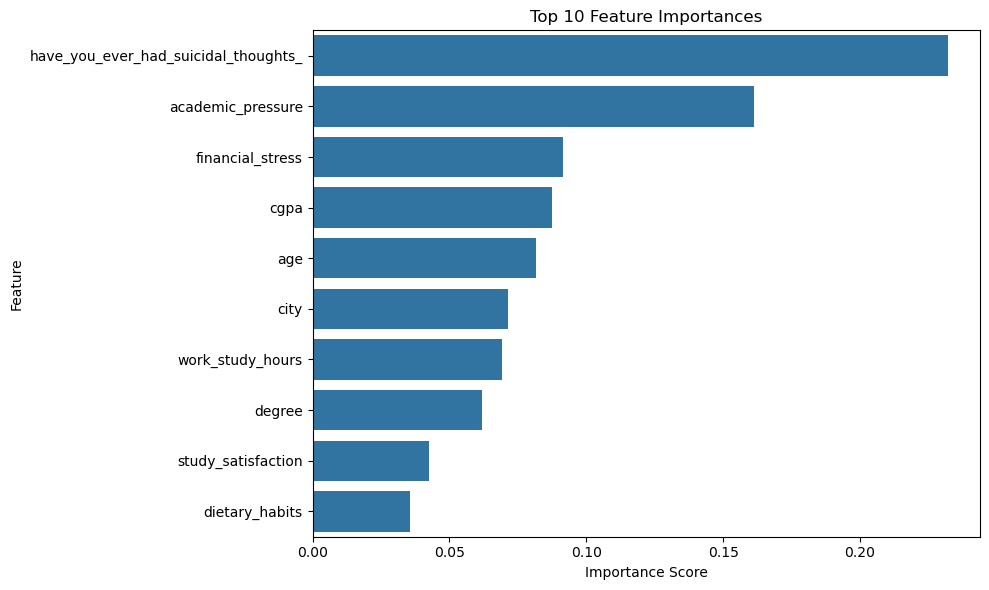

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("student_depression_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '').str.replace('/', '_')

# Drop ID column if present
df.drop(columns=["id"], inplace=True, errors="ignore")

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop("depression", axis=1)
y = df_encoded["depression"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.sort_values(ascending=False)[:10],
            y=importances.sort_values(ascending=False).index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2741  764]
 [ 631 4235]]


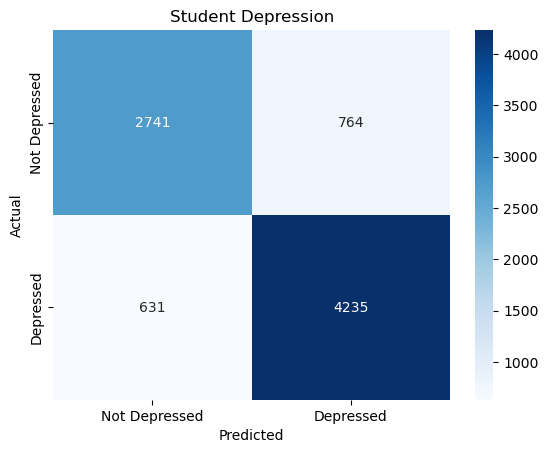

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Student Depression')
plt.show()